In [3]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import sympy as sy
sy.init_printing()

A set of vectors, S = {a, b, c, ... z} is linearly independent if all c's (scalars) are zero. If any c != 0, the set is linearly dependent. In other words, S is dependent if and only if the rref of [S] has at least one free variable.

In [5]:
# example set
A = sy.Matrix([[1,4,2,0],
               [2,5,1,0],
               [3,6,0,0]])
A.rref()

⎛⎡1  0  -2  0⎤        ⎞
⎜⎢           ⎥        ⎟
⎜⎢0  1  1   0⎥, (0, 1)⎟
⎜⎢           ⎥        ⎟
⎝⎣0  0  0   0⎦        ⎠

Since the solution involves a free variable, xsub3, it could be non-zero, and therefore the set is linearly dependent.

In addition, any set of vectors in R^n with more than n vectors is automatically dependent, and any set containing a zero vector is also automatically dependent. 

In [6]:
# 1.6 #5 a
B = sy.Matrix([[3,4,7,5],
            [-1,-2,-1,1],
            [4,9,2,-8]])
B.rref()



⎛⎡1  0  5   7 ⎤        ⎞
⎜⎢            ⎥        ⎟
⎜⎢0  1  -2  -4⎥, (0, 1)⎟
⎜⎢            ⎥        ⎟
⎝⎣0  0  0   0 ⎦        ⎠

In [8]:
# 1.6 #5 b
C = sy.Matrix([[5,8,4,5,13],
                [-3,-5,-2,-2,-9],
                [6,9,6,9,12]
])
C.rref()

⎛⎡1  0  4   9   -7⎤        ⎞
⎜⎢                ⎥        ⎟
⎜⎢0  1  -2  -5  6 ⎥, (0, 1)⎟
⎜⎢                ⎥        ⎟
⎝⎣0  0  0   0   0 ⎦        ⎠

In [10]:
# 1.6 #5 c
D = sy.Matrix([[5,-3,8,-2,-11],
                [8,-5,11,5,-8],
                [-2,1,-5,9,14],
                [4, -2, 7, -6, -13]
])
D.rref()

⎛⎡1  0  0  3   4 ⎤           ⎞
⎜⎢               ⎥           ⎟
⎜⎢0  1  0  -5  -3⎥           ⎟
⎜⎢               ⎥, (0, 1, 2)⎟
⎜⎢0  0  1  -4  -5⎥           ⎟
⎜⎢               ⎥           ⎟
⎝⎣0  0  0  0   0 ⎦           ⎠

In [13]:
# 1.6 #5 d
E = sy.Matrix([
    [2,-3,-1,-4,2,0],
    [-5,6,-5,9,-5,-1],
    [1,0,7,-1,1,1],
    [3,-4,1,-5,-3,5]
])
E.rref()

⎛⎡1  0  7  0  -8  8 ⎤           ⎞
⎜⎢                  ⎥           ⎟
⎜⎢0  1  5  0  6   -4⎥           ⎟
⎜⎢                  ⎥, (0, 1, 3)⎟
⎜⎢0  0  0  1  -9  7 ⎥           ⎟
⎜⎢                  ⎥           ⎟
⎝⎣0  0  0  0  0   0 ⎦           ⎠

In [16]:
# 1.6 #5 e
F = sy.Matrix([
    [1,0,7,3,4,9, -9],
    [3,-4,1,1,5,-1,3],
    [2,-3,-1,-4,2,6,-7],
    [-5,6,-5,2,-7,-8,5]
])
F.rref()

⎛⎡1  0  7  0  0  2   3 ⎤              ⎞
⎜⎢                     ⎥              ⎟
⎜⎢0  1  5  0  0  6   -5⎥              ⎟
⎜⎢                     ⎥, (0, 1, 3, 4)⎟
⎜⎢0  0  0  1  0  -3  4 ⎥              ⎟
⎜⎢                     ⎥              ⎟
⎝⎣0  0  0  0  1  4   -6⎦              ⎠

In [19]:
# 1.6 #5 f
G = sy.Matrix([
    [2,-3,-1,-4,2,6,-7],
    [-5,6,-5,2,-7,-8,5],
    [-4,3,-13,-8,-8,2,-11],
    [1,0,7,3,4,9,-9],
    [3,-4,1,1,5,-1,3]
])
G.rref()

⎛⎡1  0  7  0  0  2   3 ⎤              ⎞
⎜⎢                     ⎥              ⎟
⎜⎢0  1  5  0  0  6   -5⎥              ⎟
⎜⎢                     ⎥              ⎟
⎜⎢0  0  0  1  0  -3  4 ⎥, (0, 1, 3, 4)⎟
⎜⎢                     ⎥              ⎟
⎜⎢0  0  0  0  1  4   -6⎥              ⎟
⎜⎢                     ⎥              ⎟
⎝⎣0  0  0  0  0  0   0 ⎦              ⎠

In addition, linear dependence can be visualized where two vectors are scalar multiples of one another.

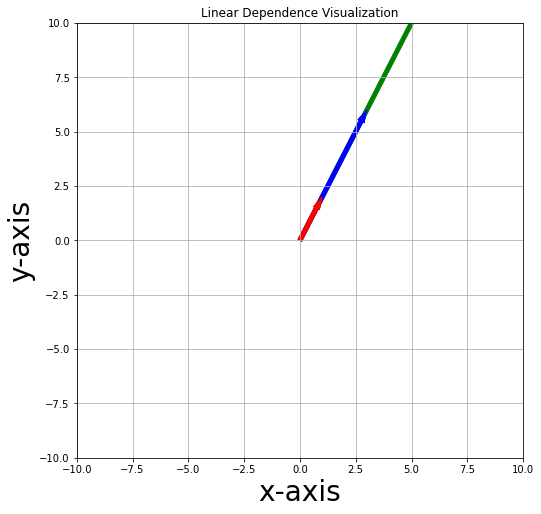

In [34]:

fig, ax = plt.subplots(figsize = (8, 8))
#######################Arrows#######################
arrows = np.array([[[0,0,1,2]],
                   [[0,0,3,6]], 
                   [[0,0,9,18]]])
colors = ['r','b','g']
for i in range(arrows.shape[0]):
    X,Y,U,V = zip(*arrows[i,:,:])
    ax.arrow(X[0], Y[0], U[0],V[0], color = colors[i], width = .18, 
             length_includes_head = True,
             head_width = .3, # default: 3*width
             head_length = .6,
             overhang = .4, zorder = -i)

ax.grid(True)
ax.set_title('Linear Dependence Visualization')
ax.axis([-10, 10, -10, 10])
ax.set_xlabel('x-axis', size = 28)
ax.set_ylabel('y-axis', size = 28)
plt.show()

When Ax = 0 has a trivial/unique solution, ex: (c1, c2, c3) = (0, 0, 0), then the columns of A are linearly independent.
Example below where the solution is (0, 0, 0)

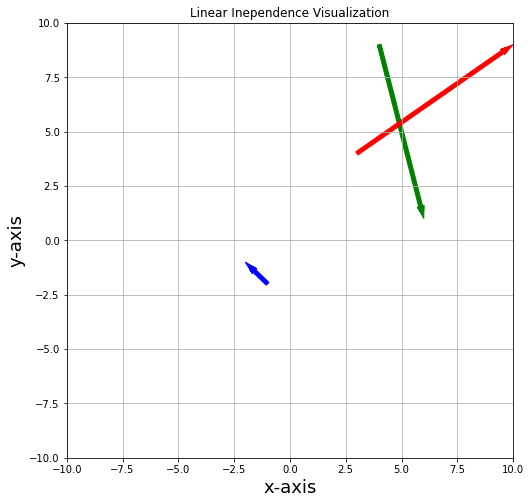

In [26]:
fig, ax = plt.subplots(figsize = (8, 8))
#######################Arrows#######################
arrows = np.array([[[3,4,7,5]],
            [[-1,-2,-1,1]],
            [[4,9,2,-8]]])
colors = ['r','b','g']
for i in range(arrows.shape[0]):
    X,Y,U,V = zip(*arrows[i,:,:])
    ax.arrow(X[0], Y[0], U[0],V[0], color = colors[i], width = .18, 
             length_includes_head = True,
             head_width = .3, # default: 3*width
             head_length = .6,
             overhang = .4, zorder = -i)

ax.grid(True)
ax.set_title('Linear Inependence Visualization in R2')
ax.axis([-10, 10, -10, 10])
ax.set_xlabel('x-axis', size = 18)
ax.set_ylabel('y-axis', size = 18)
plt.show()

In [21]:
A = sy.Matrix([[0,1,4,0],[1,2,-1,0],[5,8,0,0]])
A.rref()

⎛⎡1  0  0  0⎤           ⎞
⎜⎢          ⎥           ⎟
⎜⎢0  1  0  0⎥, (0, 1, 2)⎟
⎜⎢          ⎥           ⎟
⎝⎣0  0  1  0⎦           ⎠

Linear Independence can also be determined/proved by using determinants or by finding the rref.
Let B = [{1,1,1}, {1,1,0},{1,0,0}]

If the determinant of [B] != 0, then B is Linearly Independent.

The Minimizing Theorum:

Suppose R is the rref of matrix A.
-If R has only leading variables, then S is already independent. 
-If R has at least one free variable, then S is dependent. 
-All leading columns are independent, and thus cannot be written as linear combinations of each other.

![title](resources/Minimizing.jpg)

https://www.youtube.com/watch?v=azN0ImePZQY
